In [113]:
# все импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# деревья решений
from sklearn.datasets import load_iris # датасет от sklearn
from sklearn import tree
import graphviz

In [114]:
scoring = {
           'roc_auc' : 'roc_auc',
           'accuracy' : 'accuracy',
           'precision' : 'precision',
           'recall' : 'recall'
           }
# выбираем те метрики, которые нам нужны, причем мы можем дать им свои обозначения

# Задание 1

Набор данных [отсюда](https://www.kaggle.com/datasets/uciml/glass)

Можно использовать в каждом задании один любой классификатор (не обязательно все 3), но вы должны попробовать как минимум 2 разных

Кросс-валидация и метрики качества будут плюсом (можно автоматически подбирать лучшие гиперпараметры)


In [116]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [117]:
x = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = df['Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [118]:
knn = KNeighborsClassifier(n_neighbors=2, weights = 'distance') # пока оставляем параметры, скопированные из интернетика

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array([1, 7, 7, 2, 7, 7, 1, 3, 1, 3, 2, 2, 5, 1, 2, 7, 2, 2, 1, 7, 1, 1,
       1, 7, 2, 5, 1, 2, 5, 5, 1, 2, 2, 1, 5, 2, 1, 2, 1, 7, 1, 1, 1, 1,
       2, 6, 2, 1, 6, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 5, 2, 1, 1])

In [119]:
accuracy_score(y_test, y_pred)

0.7538461538461538

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.86      0.75        21
           2       0.85      0.74      0.79        23
           3       0.50      0.20      0.29         5
           5       0.67      1.00      0.80         4
           6       1.00      0.67      0.80         3
           7       0.88      0.78      0.82         9

    accuracy                           0.75        65
   macro avg       0.76      0.71      0.71        65
weighted avg       0.76      0.75      0.74        65



In [121]:
scores = cross_validate(knn,
                        x_train,
                        y_train,
                        scoring='accuracy',
                        cv=5,
                        return_estimator=True,
                        return_train_score=True)

scores

{'fit_time': array([0.01447439, 0.01908565, 0.00307941, 0.00285268, 0.0027864 ]),
 'score_time': array([0.03078914, 0.00867105, 0.00363231, 0.00415659, 0.00329995]),
 'estimator': [KNeighborsClassifier(n_neighbors=2, weights='distance'),
  KNeighborsClassifier(n_neighbors=2, weights='distance'),
  KNeighborsClassifier(n_neighbors=2, weights='distance'),
  KNeighborsClassifier(n_neighbors=2, weights='distance'),
  KNeighborsClassifier(n_neighbors=2, weights='distance')],
 'test_score': array([0.7       , 0.66666667, 0.63333333, 0.66666667, 0.68965517]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [122]:
scores_df = pd.DataFrame.from_dict(scores)
scores_df

,fit_time,score_time,estimator,test_score,train_score
0,0.014474,0.030789,"KNeighborsClassifier(n_neighbors=2, weights='d...",0.700000,1.0
1,0.019086,0.008671,"KNeighborsClassifier(n_neighbors=2, weights='d...",0.666667,1.0
2,0.003079,0.003632,"KNeighborsClassifier(n_neighbors=2, weights='d...",0.633333,1.0
3,0.002853,0.004157,"KNeighborsClassifier(n_neighbors=2, weights='d...",0.666667,1.0
4,0.002786,0.003300,"KNeighborsClassifier(n_neighbors=2, weights='d...",0.689655,1.0


In [123]:
# подберем гиперпараметры
parameters = {'n_neighbors':range(2,20), 'weights' : ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), parameters)
grid.fit(x, y)
tree_model = grid.best_estimator_
print(grid.best_score_, grid.best_params_)

0.640531561461794 {'n_neighbors': 2, 'weights': 'distance'}


# Задание 2

Набор данных [отсюда](https://www.kaggle.com/datasets/anyasorc/valentine-dataset/code)

In [124]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/valentine_dataset.csv')
df

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...,...
19995,Michael Vega,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,Debra Horn,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,Aaron Burgess,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,Rebecca Morton,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [125]:
df['sex_coded'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
education_mapping = {'Bsc': 1, 'Master': 2, 'PhD': 3, 'High School': 4}
df['education_coded'] = df['Educational_Status'].map(education_mapping)

# Перекодировка колонки Job_Type
job_mapping = {'Employed': 1, 'Self Employed': 2}
df['job_coded'] = df['Job_Type'].map(job_mapping)

In [126]:
df.head()

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date,sex_coded,education_coded,job_coded
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1,1,1,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1,1,1,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1,1,3,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1,1,2,2
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0,1,1,1


In [127]:
x = df[['Age', 'sex_coded','education_coded','job_coded']]
y = df["Valentine_Date"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [128]:
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50      3056
           1       0.49      0.51      0.50      2944

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



In [129]:
df_logreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_logreg

,Actual,Predicted
19134,0,0
4981,1,0
16643,0,1
19117,1,0
5306,1,1
...,...,...
9532,0,1
9764,0,0
19241,1,1
3452,1,1


Стараемся не расстраиваться ;)
---

In [130]:
accuracy_score(y_pred, y_test)

0.5018333333333334

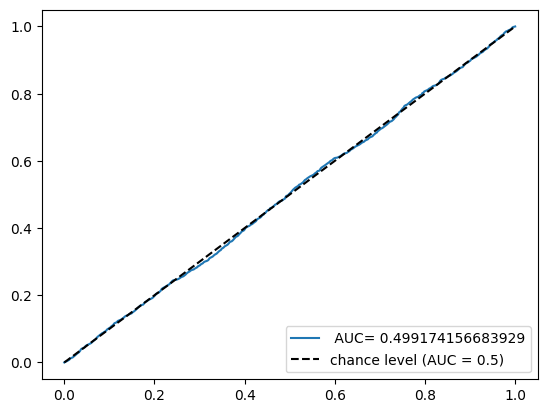

In [131]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label=" AUC= "+str(auc))
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc=4);

In [ ]:
# классы: Valentine_Date (0 или 1)
# сразу важное: не расстраивайтесь, если получится не вау))


In [132]:
scores = cross_validate(log_reg,
                        x_train,
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_estimator=True,
                        return_train_score=True)

scores

{'fit_time': array([0.02837825, 0.02598047, 0.02918124, 0.03795815, 0.0339067 ]),
 'score_time': array([0.0172627 , 0.01684761, 0.02095056, 0.01708102, 0.01734471]),
 'estimator': [LogisticRegression(class_weight='balanced'),
  LogisticRegression(class_weight='balanced'),
  LogisticRegression(class_weight='balanced'),
  LogisticRegression(class_weight='balanced'),
  LogisticRegression(class_weight='balanced')],
 'test_roc_auc': array([0.49815744, 0.52295544, 0.49530678, 0.49974053, 0.51052867]),
 'train_roc_auc': array([0.51485689, 0.50804346, 0.51555361, 0.51435657, 0.51094412]),
 'test_accuracy': array([0.50392857, 0.51428571, 0.49607143, 0.49678571, 0.5075    ]),
 'train_accuracy': array([0.51276786, 0.50875   , 0.50910714, 0.51133929, 0.50732143]),
 'test_precision': array([0.49859944, 0.50918442, 0.49065744, 0.49105225, 0.50181028]),
 'train_precision': array([0.50710227, 0.50311222, 0.50358038, 0.50582751, 0.50178571]),
 'test_recall': array([0.51407942, 0.50036101, 0.51228324, 0

In [133]:
scores_df = pd.DataFrame.from_dict(scores)
scores_df

,fit_time,score_time,estimator,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.028378,0.017263,LogisticRegression(class_weight='balanced'),0.498157,0.514857,0.503929,0.512768,0.498599,0.507102,0.514079,0.515803
1,0.025980,0.016848,LogisticRegression(class_weight='balanced'),0.522955,0.508043,0.514286,0.508750,0.509184,0.503112,0.500361,0.510926
2,0.029181,0.020951,LogisticRegression(class_weight='balanced'),0.495307,0.515554,0.496071,0.509107,0.490657,0.503580,0.512283,0.507945
3,0.037958,0.017081,LogisticRegression(class_weight='balanced'),0.499741,0.514357,0.496786,0.511339,0.491052,0.505828,0.495665,0.509390
4,0.033907,0.017345,LogisticRegression(class_weight='balanced'),0.510529,0.510944,0.507500,0.507321,0.501810,0.501786,0.500723,0.507403


In [134]:
y_pred_cv_1 = scores['estimator'][1].predict(x_test)